In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [6]:
import pandas as pd
df = pd.DataFrame(faces.data)
df

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,...,113.000000,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,...,236.666672,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,...,83.333336,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,...,90.000000,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,...,41.666668,39.666668,37.333332,34.333332,34.000000,34.333332,34.333332,34.666668,35.666668,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,44.333332,46.000000,45.333332,58.000000,80.333336,112.333336,146.666672,168.000000,175.000000,178.666672,...,80.333336,94.666664,89.666664,91.666664,94.000000,90.333336,86.333336,87.000000,94.333336,116.333336
1344,86.333336,83.333336,76.333336,74.333336,87.666664,114.000000,144.666672,167.333328,180.333328,183.666672,...,52.333332,50.666668,46.333332,42.333332,40.666668,41.333332,43.666668,48.000000,49.000000,40.666668
1345,29.333334,29.000000,29.333334,48.666668,90.666664,96.000000,85.000000,78.666664,123.000000,156.333328,...,133.666672,134.000000,132.666672,134.333328,141.000000,147.666672,145.000000,145.000000,147.000000,141.666672
1346,49.333332,55.666668,76.666664,89.666664,76.666664,75.333336,98.666664,118.333336,111.000000,82.000000,...,157.000000,169.000000,170.666672,174.000000,184.333328,202.000000,200.666672,186.333328,176.333328,161.000000


In [ ]:
faces

In [24]:
from sklearn.decomposition import PCA as RandomizedPCA
#from sklearn.decomposition import RandomizedPCA
nr_of_pcomponents = 50
pca = RandomizedPCA(nr_of_pcomponents)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

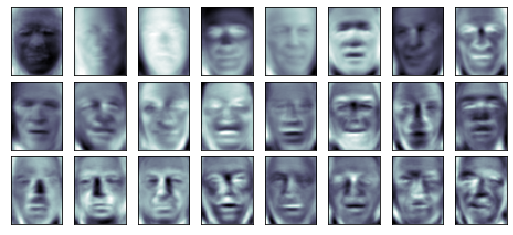

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

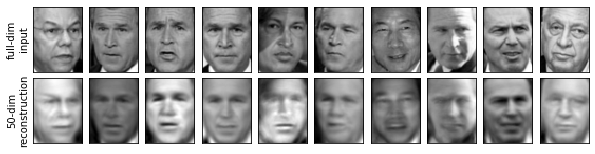

In [28]:
nr_of_pcomponents = 50
pca = RandomizedPCA(nr_of_pcomponents).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(nr_of_pcomponents)+'-dim\nreconstruction');

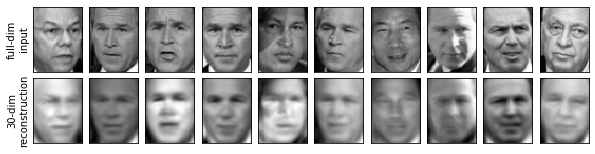

In [29]:
nr_of_pcomponents = 30
pca = RandomizedPCA(nr_of_pcomponents).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(nr_of_pcomponents)+'-dim\nreconstruction');

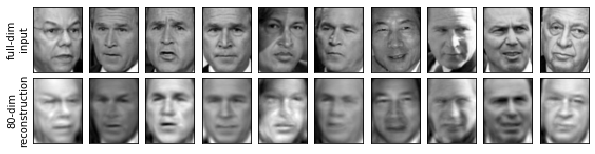

In [30]:
nr_of_pcomponents = 80
pca = RandomizedPCA(nr_of_pcomponents).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(nr_of_pcomponents)+'-dim\nreconstruction');

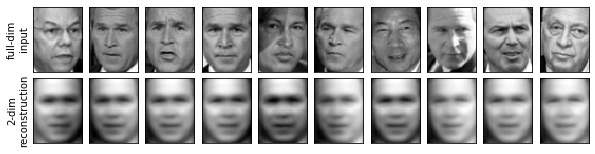

In [31]:
nr_of_pcomponents = 2
pca = RandomizedPCA(nr_of_pcomponents).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(nr_of_pcomponents)+'-dim\nreconstruction');

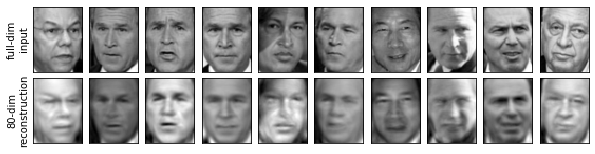

In [34]:
nr_of_pcomponents = 80
pca = RandomizedPCA(nr_of_pcomponents).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(nr_of_pcomponents)+'-dim\nreconstruction');

In [33]:
400/3000

0.13333333333333333

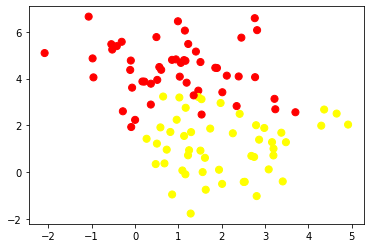

In [35]:
from sklearn.datasets import make_blobs
#import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');